In [60]:
import getpass
from muse import signin, choose_member, chat_evaluation
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
email = input('email> ')
password = getpass.getpass('password> ')
jwt = signin(email,password)
member_id = choose_member(jwt)

email> test@test.com
password> ········
Choose a member
1 Default Member
member id> 1


In [3]:
evaluation_res = chat_evaluation(jwt,member_id)

In [40]:
evaluation_res

{'data': {'favorite_words': [['hello', 44],
   ['I', 35],
   ["'s", 31],
   ["n't", 24],
   ['hey', 24],
   ['hi', 19],
   ['like', 16],
   ['know', 13],
   ['yes', 11],
   ['favorite', 11],
   ['back', 10],
   ['really', 9],
   ['good', 9],
   ['think', 8],
   ['yeah', 7],
   ['girl', 7],
   ['people', 7],
   ['go', 6],
   ['name', 6],
   ['one', 6]],
  'relevance_scores': [{'scores': [{'s1': 'Oh hi there',
      's2': 'how are oyu',
      'score': 0.866374671459198}],
    'timestamp': '2018-01-15T07:11:02.695265'},
   {'scores': [{'s1': 'In Seoul, It is  4:13 p.m.',
      's2': 'great',
      'score': 0.8353058695793152},
     {'s1': 'Yup, preety sweet.',
      's2': 'how are you doing',
      'score': 0.675905168056488}],
    'timestamp': '2018-01-15T07:13:57.507979'},
   {'scores': [{'s1': "It do.. Luckily I'll be moving within the month and won't have to sweat it anymore.",
      's2': 'where are you moving to',
      'score': 0.8861770033836365},
     {'s1': 'Though I will be mov

# Most used words 

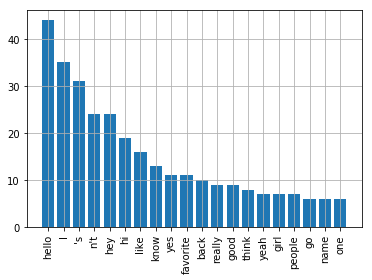

In [22]:
favorite_words = evaluation_res['data']['favorite_words']

fig,ax = plt.subplots(1,1)
ax.bar(range(len(favorite_words)),[w[1] for w in favorite_words])
ax.set_xticks(range(len(favorite_words)))
ax.set_xticklabels([w[0] for w in favorite_words],rotation=90)
plt.grid()

# Word level pie chart

In [32]:
cnts = []
lvls = evaluation_res['data']['word_level_composition'].keys()
for lvl in lvls:
    count = evaluation_res['data']['word_level_composition'][lvl]['count']
    cnts.append(count)

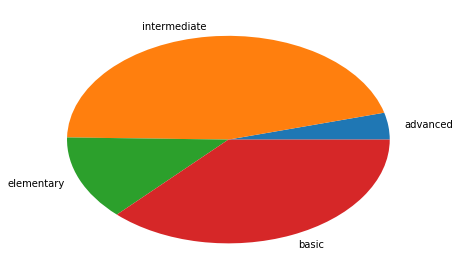

In [39]:
fig,ax = plt.subplots(1,1)
ax.pie(cnts,labels=lvls)
plt.tight_layout()

# Relevance score vs. time

In [44]:
relevance_scores = evaluation_res['data']['relevance_scores']
session_timestamps = [e['timestamp'] for e in relevance_scores]

## Get average relevance score of user utterance for each dialogue session

In [70]:
mean_session_scores = []
session_timestamps = []
for session in relevance_scores:
    session_timestamps.append(datetime.strptime(session['timestamp'].split('T')[0],'%Y-%m-%d'))
    scores = []
    for pair in session['scores']:
        scores.append(pair['score'])
    mean_session_score = np.mean(scores)
    mean_session_scores.append(mean_session_score)
        
    

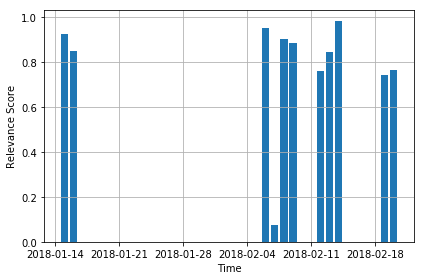

In [81]:
fig, ax = plt.subplots(1,1)

ax.bar(session_timestamps,mean_session_scores)

plt.ylabel('Relevance Score')
plt.xlabel('Time')
plt.grid()
plt.tight_layout()